In [1]:
import os
import tensorflow as tf

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Dropout,GlobalAveragePooling2D
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

In [3]:
directory=r"C:/Users/PythonTeam/Desktop/BALAJI/BALAJI/DL Projects/Classification_of_Oral_Cancer_Into_Pre-Cancerous_Stages_From_White_Light_Images_Using_LightGBM_Algorithm/mhjyrn35p4-2\Oral Images Dataset"
train_dir=os.path.join(directory,'Train')
val_dir=os.path.join(directory,'Validation')

In [4]:
Image_height,Image_width=224,224
Epochs=50
Batch_size=32

In [5]:
train_datagenerator=ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

In [6]:
train_generator=train_datagenerator.flow_from_directory(
    directory,
    target_size=(Image_height,Image_width),
    batch_size=Batch_size,
    class_mode='categorical',
    subset='training')

Found 2075 images belonging to 2 classes.


In [7]:
validation_generator=train_datagenerator.flow_from_directory(
    directory,
    target_size=(Image_height,Image_width),
    batch_size=Batch_size,
    class_mode='categorical',
    subset='training')

Found 2075 images belonging to 2 classes.


In [8]:
def create_model(model):
    model.trainable=True
    x=model.output
    x=GlobalAveragePooling2D()(x)
    x=Dense(1024,activation='relu')(x)
    x=Dropout(0.5)(x)
    output_layer=Dense(2,activation='softmax')(x)
    models=Model(inputs=model.input,outputs=output_layer)
    return models

In [9]:
mode={
    'MobileNetV2':MobileNetV2(weights='imagenet',include_top=False,input_shape=(Image_height,Image_width,3))}

In [10]:
results={}
for name,base_model in mode.items():
    print(f"Training {name}...")
    model=create_model(base_model)
    model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
    Max=model.fit(
        train_generator,
        epochs=Epochs,
        validation_data=validation_generator,
        verbose=1,
        callbacks=[tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=3,min_lr=1e-6)])
    loss, accuracy = model.evaluate(validation_generator)
    print(f"{name} - Validation Loss: {loss:.4f}, Validation Accuracy: {accuracy:.4f}")
    results[name] = accuracy

Training MobileNetV2...


C:\Users\PythonTeam\anaconda3\envs\python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 531s 6s/step - accuracy: 0.8560 - loss: 0.4125 - val_accuracy: 0.8790 - val_loss: 0.4356 - learning_rate: 1.0000e-04
Epoch 2/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 412s 6s/step - accuracy: 0.9236 - loss: 0.2065 - val_accuracy: 0.8983 - val_loss: 0.2956 - learning_rate: 1.0000e-04
Epoch 3/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 394s 6s/step - accuracy: 0.9482 - loss: 0.1477 - val_accuracy: 0.8761 - val_loss: 0.6936 - learning_rate: 1.0000e-04
Epoch 4/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 558s 9s/step - accuracy: 0.9461 - loss: 0.1421 - val_accuracy: 0.9065 - val_loss: 0.3900 - learning_rate: 1.0000e-04
Epoch 5/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 384s 6s/step - accuracy: 0.9584 - loss: 0.1105 - val_accuracy: 0.8916 - val_loss: 0.6769 - learning_rate: 1.0000e-04
Epoch 6/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 374s 6s/step - accuracy: 0.9638 - loss: 0.0857 - val_accuracy: 0.9195 - val_loss: 0.3436 - learning_rate: 2.0000e-05
Epoch 7/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 381s 6s/step - accuracy: 0.9716 

In [11]:
val_generator = validation_generator
val_generator.reset()
predictions = model.predict(val_generator, verbose=1)
y_pred = np.argmax(predictions, axis=1)
y_true = val_generator.classes

65/65 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step


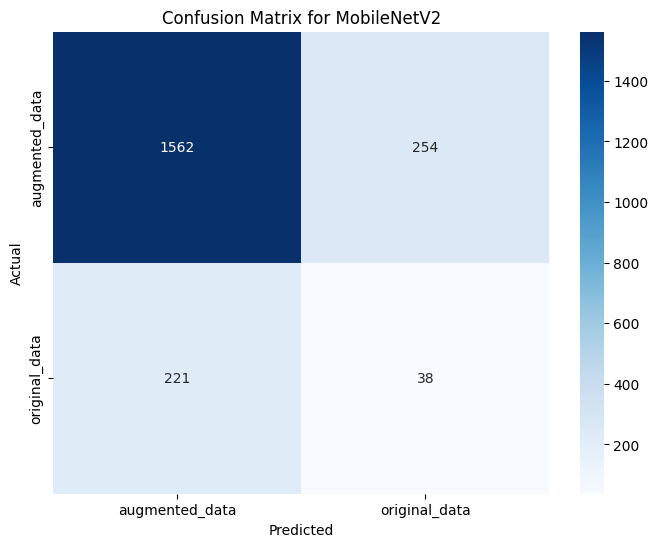

In [12]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=val_generator.class_indices.keys(), yticklabels=val_generator.class_indices.keys())
plt.title(f"Confusion Matrix for {name}")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [13]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 112, 112, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 112, 112, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 112, 112, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 112, 112, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 112, 112, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 112, 112, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 112, 112, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 112, 112, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 112, 112, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 112, 112, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 112, 112, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 113, 113, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 56, 56, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 10,647,112 (40.62 MB)

 Trainable params: 3,537,666 (13.50 MB)

 Non-trainable params: 34,112 (133.25 KB)

 Optimizer params: 7,075,334 (26.99 MB)

In [14]:
model.save(f"{name}_oral_cancer.h5")